<a href="https://colab.research.google.com/github/aaalok5106/DL_Project/blob/master/final_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Load the Drive helper and mount
from google.colab import drive
# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [1]:
# After executing the cell above, Drive
# files will be present in "/content/drive/My Drive".
!ls "/content/drive/My Drive/DL_Project"

dataset        MURA-v1.1.zip		 Untitled0.ipynb
final_2.ipynb  temp			 valid_filepath_label.txt
model1.h5      train_filepath_label.txt


In [2]:
!ls

drive  model1.h5  MURA-v1.1  sample_data


In [3]:
!du -sh "/content/MURA-v1.1"

3.4G	/content/MURA-v1.1


In [0]:
import IPython.display as display
from __future__ import absolute_import, division, print_function

import tensorflow as tf

import pandas as pd
from os import listdir
from os.path import isfile, join

In [0]:
def load_data(filename):
  data = pd.read_csv('./MURA-v1.1/'+filename, sep = ",", header = None)
  data.columns = ["datapath","label"]
  return data

In [0]:
data = load_data('train_labeled_studies.csv')
path = []
label = []
for i, j in data.iterrows():
  mypath = './' + j['datapath']
  onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))] 
  for k in onlyfiles:
    #print( j['datapath']+k, j['label'] )
    path.append(j['datapath']+k)
    label.append(j['label'])

label_value = ['not_fractured', 'fractured']

In [7]:
import os
import pprint
import tensorflow as tf

if 'COLAB_TPU_ADDR' not in os.environ:
  print('ERROR: Not connected to a TPU runtime; please see the first cell in this notebook for instructions!')
else:
  tpu_address = 'grpc://' + os.environ['COLAB_TPU_ADDR']
  print ('TPU address is', tpu_address)

  with tf.Session(tpu_address) as session:
    devices = session.list_devices()
    
  print('TPU devices:')
  pprint.pprint(devices)

TPU address is grpc://10.12.210.2:8470
TPU devices:
[_DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:CPU:0, CPU, -1, 2507236333395426125),
 _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 17179869184, 15464962281317413747),
 _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:TPU:0, TPU, 17179869184, 11248967432684262263),
 _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:TPU:1, TPU, 17179869184, 16475557513806160393),
 _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:TPU:2, TPU, 17179869184, 17428645771128786527),
 _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:TPU:3, TPU, 17179869184, 12956162779786239193),
 _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:TPU:4, TPU, 17179869184, 16242062214240643995),
 _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:TPU:5, TPU, 17179869184, 11145879551395548292),
 _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:TPU:6, TPU, 17179869184, 1267497199

In [0]:
import os 
from numpy import *

In [0]:
# pre processing of images

from PIL import Image

# size of image
row, col = 64, 64
channel = 1
bdir = '/content/'

In [12]:
# train skip i = 25001, 25003, 25005, 25006
exclude = [25001, 25003, 25005, 25006]

gray_list = []


for i in range(len(path)):
  if not i in exclude:
    im = Image.open(bdir + path[i])

    img = im.resize((row, col))
    gray=img.convert('L')
    gray_list.append(gray)

path[25001]

'MURA-v1.1/train/XR_WRIST/patient07840/study1_negative/._image1.png'

In [13]:
len(gray_list)

36808

In [14]:
len(path)

36812

In [0]:
# img_mat = array([])
# tt=array(gray).flatten()
# img_mat.append(tt)
# print(img_mat)


#flatten all the images into one matrix
img_mat=array([array(gray_im).flatten() for gray_im in gray_list],'f')

In [16]:
print(img_mat)

[[ 58.  39.  35. ...  91.  91.  92.]
 [  0.   0. 115. ... 168. 165. 166.]
 [  6.   7.   8. ...   5.   5.   5.]
 ...
 [ 27.  29.  26. ...  26.  26.  26.]
 [ 21.  23.  20. ...  24.  25.  25.]
 [ 22.  25.  28. ...   4.   4.   4.]]


In [17]:
len(img_mat)

36808

In [18]:
# train skip i = 25001, 25003, 25005, 25006

label_train = []
for i in range(len(label)):
  if not i in exclude:
    label_train.append(label[i])

len(label_train)

36808

In [0]:
del gray_list

In [0]:
del label

In [0]:
from sklearn.utils import shuffle
#make sample label pairs
data1,label1=shuffle(img_mat,label_train)

In [22]:
print (len(data1), len(label1))

36808 36808


In [0]:
train_data = [data1, label1]

In [0]:
del img_mat

In [0]:
del data1

In [26]:
print(len(train_data[0]), train_data[1][0])

36808 0


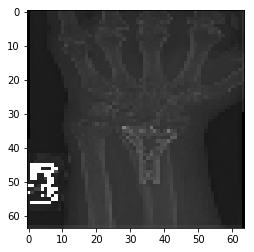

In [28]:
import matplotlib.pyplot as plt

check_img=train_data[0][100].reshape(row,col)
plt.imshow(check_img)
plt.imshow(check_img,cmap='gray')

In [0]:
batch_size=32
n_classes=2
n_epochs=2
channels=1 # no. of imagae channels
n_filters=32 #no. of conv filters to use
n_pool=2  #size of area for max pooling
n_conv=3  #size of conv kernel

(X,Y)=(train_data[0],train_data[1])

In [30]:
from sklearn.model_selection import train_test_split
# preprocessing
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.1, random_state=4)
X_train=X_train.reshape(X_train.shape[0],1,row,col)

X_test=X_test.reshape(X_test.shape[0],1,row,col)

X_train/=255
X_test/=255

from keras.utils import np_utils
Y_train=np_utils.to_categorical(Y_train,n_classes)
Y_test=np_utils.to_categorical(Y_test,n_classes)


Using TensorFlow backend.


In [0]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras import backend as K
K.set_image_data_format('channels_first') # set format

In [32]:
# deifne the model layout
model=Sequential()

#add layers
model.add(Convolution2D(n_filters,n_conv,n_conv,border_mode='valid',input_shape=(1,row,col)))

convol1=Activation('relu')
model.add(convol1)
model.add(Convolution2D(n_filters,n_conv,n_conv))

convol2=Activation('relu')
model.add(convol2)
model.add(Convolution2D(n_filters,n_conv,n_conv))

convol3=Activation('relu')
model.add(convol3)
model.add(MaxPooling2D(pool_size=(n_pool,n_pool)))



model.add(Dropout(0.1))
model.add(Flatten())

model.add(Dense(96))
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Dense(n_classes))
model.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(1, 64, 64..., padding="valid")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  if sys.path[0] == '':


In [33]:
# compile the model
model.compile(loss='categorical_crossentropy',optimizer='adadelta',metrics=['accuracy'])

# print the model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 62, 62)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 62, 62)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 60, 60)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 32, 60, 60)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 58, 58)        9248      
_________________________________________________________________
activation_3 (Activation)    (None, 32, 58, 58)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 29, 29)        0         
__________

In [34]:
# train the model

trainin=model.fit(X_train,Y_train,batch_size=batch_size,epochs=n_epochs,verbose=1,validation_data=(X_test,Y_test))

Instructions for updating:
Use tf.cast instead.
Train on 33127 samples, validate on 3681 samples
Epoch 1/2
33127/33127 [==============================] - 841s 25ms/step - loss: 0.6571 - acc: 0.6045 - val_loss: 0.6552 - val_acc: 0.6248
Epoch 2/2
33127/33127 [==============================] - 844s 25ms/step - loss: 0.6343 - acc: 0.6335 - val_loss: 0.6375 - val_acc: 0.6216


In [35]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.6375192556018149
Test accuracy: 0.621570225482206
